In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
columns=["Id","Company","Opinion","Tweet"]

In [5]:
twitter_data=pd.read_csv("twitter_training.csv",names=columns)

In [6]:
twitter_data.head()

,Id,Company,Opinion,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
twitter_data=twitter_data.dropna()

In [8]:
twitter_data["Opinion"].value_counts()

,count
Opinion,
Negative,17593
Positive,17164
Neutral,14538
Irrelevant,11530


In [ ]:
twitter_data.shape

(31849, 4)

In [ ]:
twitter_data.drop_duplicates("Tweet",inplace=True)

/tmp/ipython-input-1887224594.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=twitter_data,x="Opinion",palette="husl");


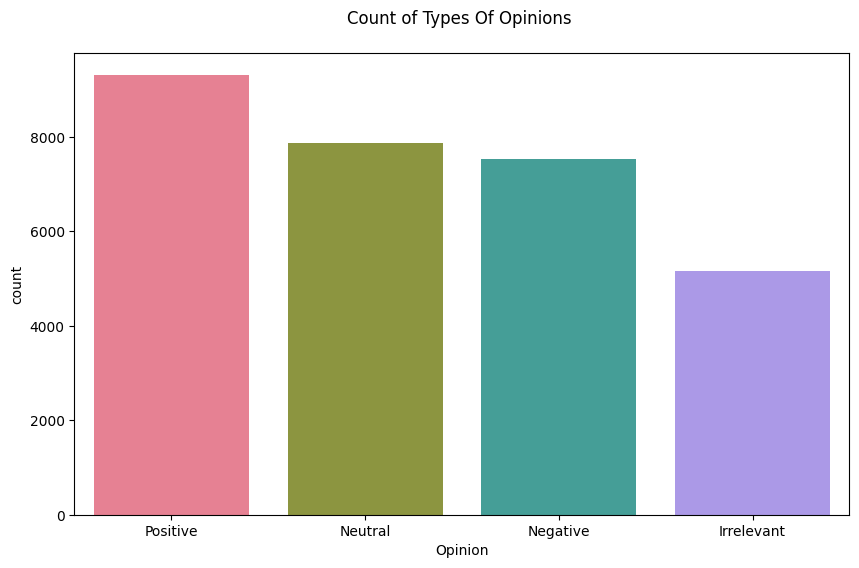

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Count of Types Of Opinions \n")
sns.countplot(data=twitter_data,x="Opinion",palette="husl");

/tmp/ipython-input-2626674397.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_five_positive.index,y=top_five_positive.values,palette="hls");


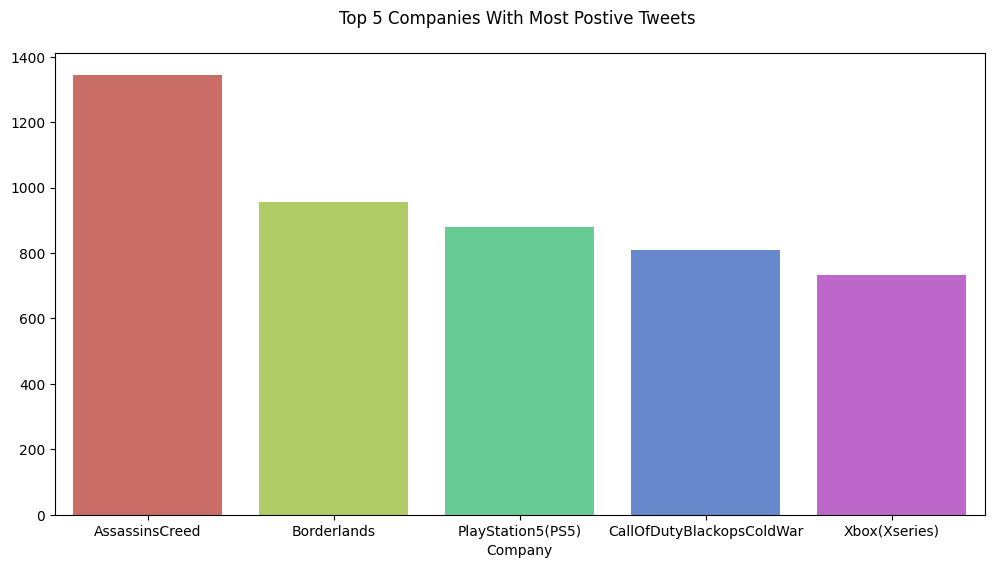

In [ ]:
con=twitter_data["Opinion"]=="Positive"
top_five_positive=twitter_data.loc[con].Company.value_counts().nlargest(5)
plt.figure(figsize=(12,6))
plt.title("Top 5 Companies With Most Postive Tweets \n");
sns.barplot(x=top_five_positive.index,y=top_five_positive.values,palette="hls");

/tmp/ipython-input-1689676432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_five_negative.index,y=top_five_negative.values,palette="hls");


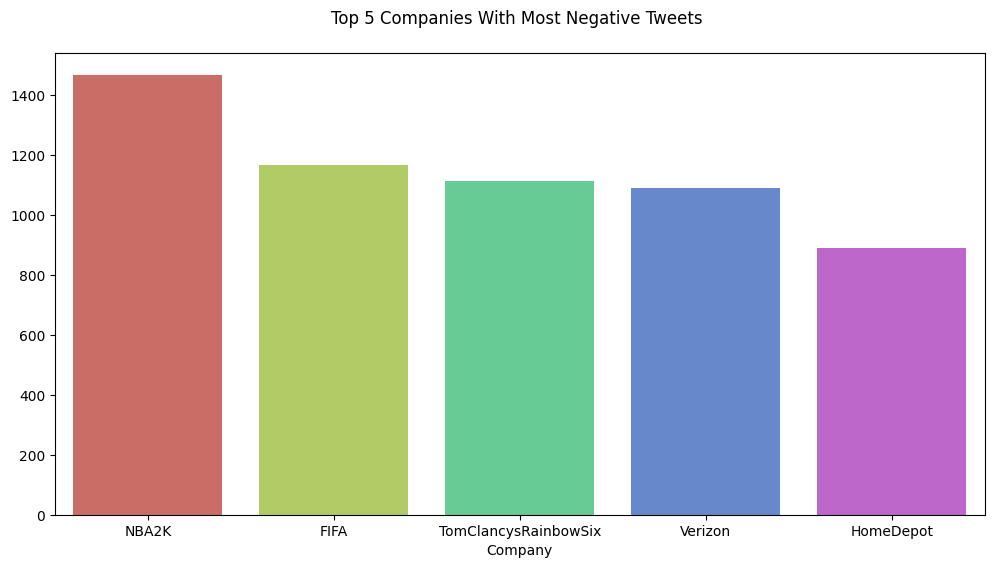

In [9]:
con=twitter_data["Opinion"]=="Negative"
top_five_negative=twitter_data.loc[con].Company.value_counts().nlargest(5)
plt.figure(figsize=(12,6))
plt.title("Top 5 Companies With Most Negative Tweets \n");
sns.barplot(x=top_five_negative.index,y=top_five_negative.values,palette="hls");

## Data Preprocessing For Sentiment Analysis

In [10]:
port_stem=PorterStemmer()

In [11]:
def stemming(content):
  stemmed_content=re.sub('[^a-zA-Z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)

  return stemmed_content

In [12]:
twitter_data["Stemmed_Content"]=twitter_data["Tweet"].apply(stemming)

In [13]:
encoder = LabelEncoder()
twitter_data["Opinion"] = encoder.fit_transform(twitter_data["Opinion"])

In [14]:
twitter_data.head()

,Id,Company,Opinion,Tweet,Stemmed_Content
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,im get borderland murder
1,2401,Borderlands,3,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,im get borderland kill
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,im come borderland murder
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,im get borderland murder


### Dependant Variables and Independant Variables

In [15]:
X=twitter_data["Stemmed_Content"].values
Y=twitter_data['Opinion'].values

In [16]:
Y.shape

(60825,)

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)

### Creating Sparse Matrix for Words


In [18]:
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [19]:
model=LogisticRegression(max_iter=1000)

In [20]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

### Predicting Sentiments and Accuracy Score  

In [21]:
X_test_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test,X_test_pred)

In [22]:
print(np.concatenate( (Y_test.reshape(len(Y_test),1) , X_test_pred.reshape(len(X_test_pred),1) ) ,1   )  )

[[1 1]
 [3 3]
 [2 2]
 ...
 [1 2]
 [3 3]
 [1 3]]


In [23]:
print("Accuracy rate of the model is "+ str(accuracy*100)+" %")

Accuracy rate of the model is 78.05178791615289 %


/tmp/ipython-input-586578539.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Opinion', data=twitter_data, order=twitter_data['Opinion'].value_counts().index, palette="Set2")


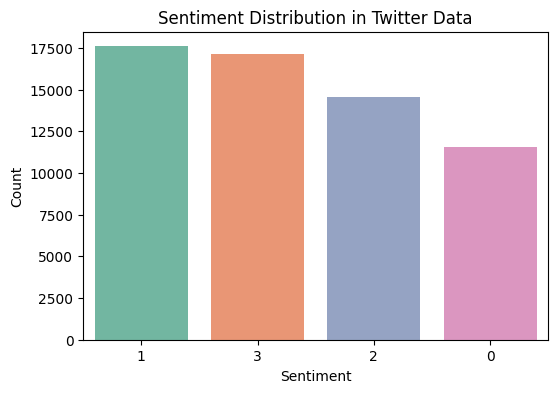

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='Opinion', data=twitter_data, order=twitter_data['Opinion'].value_counts().index, palette="Set2")
plt.title("Sentiment Distribution in Twitter Data")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [ ]:
print("Classification Report:")
print(classification_report(Y_test, X_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77      1032
           1       0.83      0.84      0.84      1508
           2       0.83      0.81      0.82      1572
           3       0.78      0.86      0.82      1863

    accuracy                           0.82      5975
   macro avg       0.82      0.81      0.81      5975
weighted avg       0.82      0.82      0.82      5975



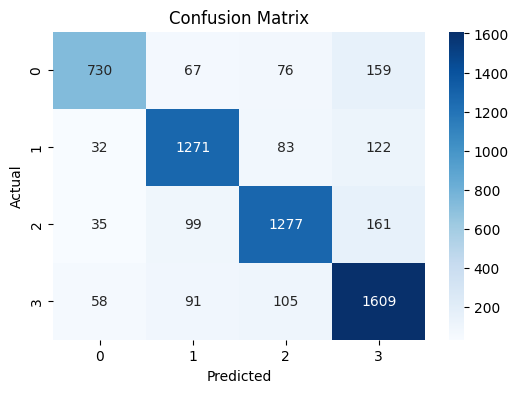

In [ ]:
cm = confusion_matrix(Y_test, X_test_pred, labels=model.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Naive Bayes for Comparison


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes for comparison
nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train)
nb_pred = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(Y_test, nb_pred)*100, "%")
print("Naive Bayes Report:")
print(classification_report(Y_test, nb_pred))


Naive Bayes Accuracy: 76.3347280334728 %
Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.97      0.46      0.62      1032
           1       0.76      0.85      0.80      1508
           2       0.86      0.71      0.78      1572
           3       0.68      0.91      0.78      1863

    accuracy                           0.76      5975
   macro avg       0.82      0.73      0.74      5975
weighted avg       0.80      0.76      0.76      5975



### Model Comparison & Selection

Logistic Regression performed better than Naive Bayes in terms of overall accuracy and class-wise F1-score.

Logistic Regression can better handle correlated features produced by TF-IDF vectorization,
while Naive Bayes assumes feature independence.

Therefore, Logistic Regression was selected as the primary model for sentiment prediction.
